In [1]:
addpath(genpath('../../matlab/HDI/'))
addpath(genpath('../../matlab/HDI/utils/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))


In [ ]:
%% parameters
Ds = [10 20 50 100];
ncell = 1;
Nq = [1:10];
method = 'GL';
tol = 1e-16;
R = cell(2,numel(Ds), numel(Nq)); % cell array - dimensions x functions x orders
for itest = 8 %choose the test problem
  for i = 1:numel(Ds)
    d = Ds(i);
    for j = 1:numel(Nq)
      norder = Nq(j);
      %       Errors(i,itest,j) = tt_GL_fn_poly(d,30,norder,ncell,1e-15);
      fprintf('\n\n Ds = %d, itest = %d, nq = %d \n',d,itest,norder);
      
      r = tt_GL_fn(itest, d, 1, method, norder, tol);
      R{1,i,j} = r;
      r = tt_GL_fn(itest, d, 2, method, norder, tol);
      R{2,i,j} = r;
    end
  end
end

%%
if 1
  filename = sprintf('T10pconv_%s.mat',method);
  save('matlab_plot_data/T10_pconv_result.mat','Ds','Nq','R');
end



 Ds = 10, itest = 8, nq = 1 
======================= Chebyshev polynomial degree 10 ========================
=amen_cross= swp=1, max_dx=5.000e-01, max_rank=1, #ifun_evals=29, #ffun_evals=0
=amen_cross= swp=2, max_dx=0.000e+00, max_rank=1, #ifun_evals=57, #ffun_evals=0
=amen_cross= swp=3, max_dx=0.000e+00, max_rank=1, #ifun_evals=67, #ffun_evals=0
Err = 4.89899e-01, time = 7.72397e-02 
======================= Chebyshev polynomial degree 10 ========================
=amen_cross= swp=1, max_dx=3.572e+00, max_rank=4, #ifun_evals=893, #ffun_evals=0
=amen_cross= swp=2, max_dx=2.294e-15, max_rank=6, #ifun_evals=2485, #ffun_evals=0
=amen_cross= swp=3, max_dx=1.783e-15, max_rank=6, #ifun_evals=2877, #ffun_evals=0
Err = 7.11761e-01, time = 1.99991e-01 


 Ds = 10, itest = 8, nq = 2 
======================= Chebyshev polynomial degree 10 ========================
=amen_cross= swp=1, max_dx=2.982e+00, max_rank=4, #ifun_evals=813, #ffun_evals=0
=amen_cross= swp=2, max_dx=1.409e-15, max_rank=6, #ifu

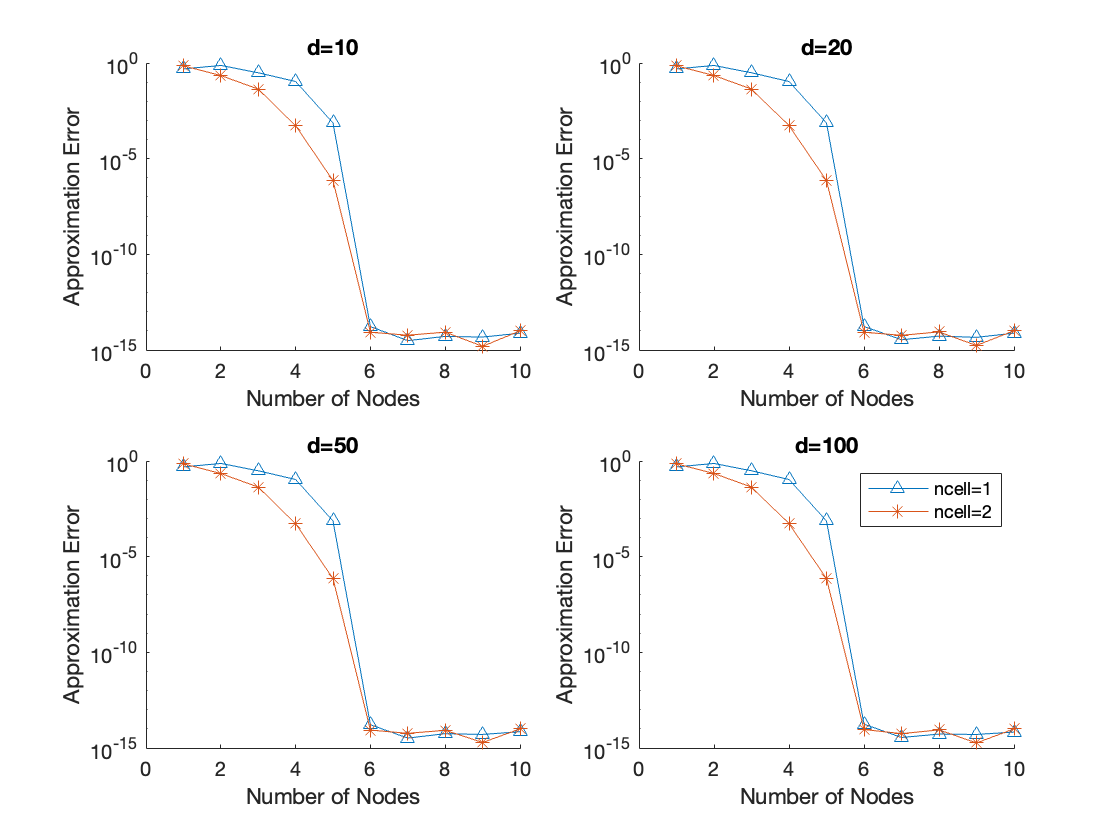

In [3]:
load('matlab_plot_data/T10_pconv_result.mat');
if 1
  figure()
  cm ={'r-s','b--^','k:o'};
  for i = 1:numel(Ds)
    subplot(2,2,i)
    hold on;
    err1 = cellfun(@(c) c.Err, R(1,i,:));
    err2 = cellfun(@(c) c.Err, R(2,i,:));
    plot(Nq,err1(:),'-^');
    plot(Nq,err2(:),'-*');
    xlabel('Number of Nodes');
    ylabel('Approximation Error');
    title(sprintf('d=%d',Ds(i)));
    set(gca,'YScale','log');
  end
  legend({'ncell=1','ncell=2'})
  
  sgtitle(sprintf(''));
end

In [4]:
writematrix(cellfun(@(c) c.Err, R(2,4,:)) , 'matlab_plot_data/d100_ncell2.dat', 'Delimiter', ' ');

In [5]:
writematrix(cellfun(@(c) c.time, R(2,4,:)) ,'matlab_plot_data/d100_ncell2_time.dat', 'Delimiter', ' ');

In [6]:
writematrix(cellfun(@(c) c.time_cross, R(2,4,:)) ,'matlab_plot_data/d100_ncell2_time_cross.dat', 'Delimiter', ' ');

In [7]:
sizes = [];

for i=1:10
    s=0;
    for j = 1:100
        s = s + R{2,4,i}.r(j)  * R{2,4,i}.n(j) * R{2,4,i}.r(j+1);
    end
    sizes(i) = s;
end

writematrix(sizes ,'matlab_plot_data/d100_ncell2_size.dat', 'Delimiter', ' ');

In [8]:
max_ranks = [];
avg_ranks = [];

for i=1:10
    max_ranks(i) = max(R{2,4,i}.r);
    avg_ranks(i) = mean(R{2,4,i}.r);
end

writematrix(max_ranks ,'matlab_plot_data/d100_ncell2_max_ranks.dat', 'Delimiter', ' ');
writematrix(avg_ranks ,'matlab_plot_data/d100_ncell2_avg_ranks.dat', 'Delimiter', ' ');